In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
 df = pd.read_csv("train.csv" , usecols=["Age","Fare","Survived"])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
 df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [6]:
 df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
df.iloc[:,1:3]

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [8]:
X = df.iloc[:,1:3]

In [9]:
df.iloc[:,0]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
y = df.iloc[:,0]

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

In [12]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [13]:
y_train.size

712

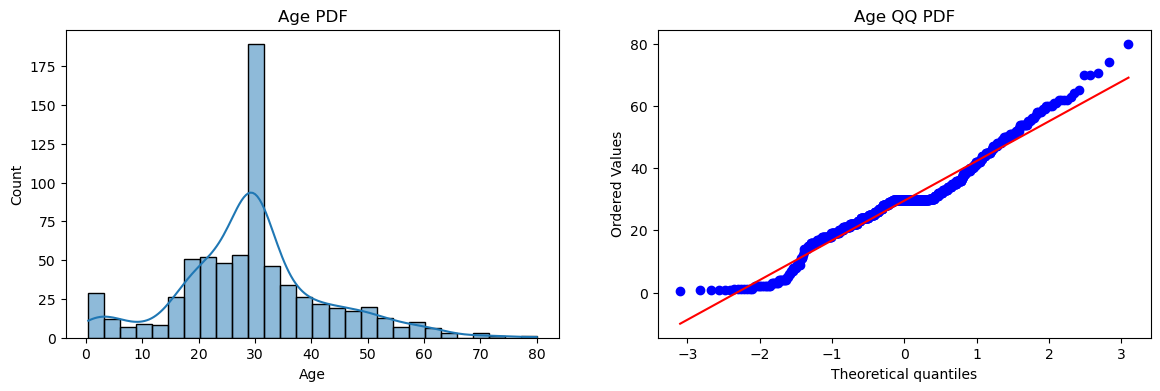

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train["Age"], kde=True)
plt.title("Age PDF")


plt.subplot(122)
stats.probplot(X_train["Age"] , dist="norm", plot=plt)
plt.title("Age QQ PDF")
plt.show()



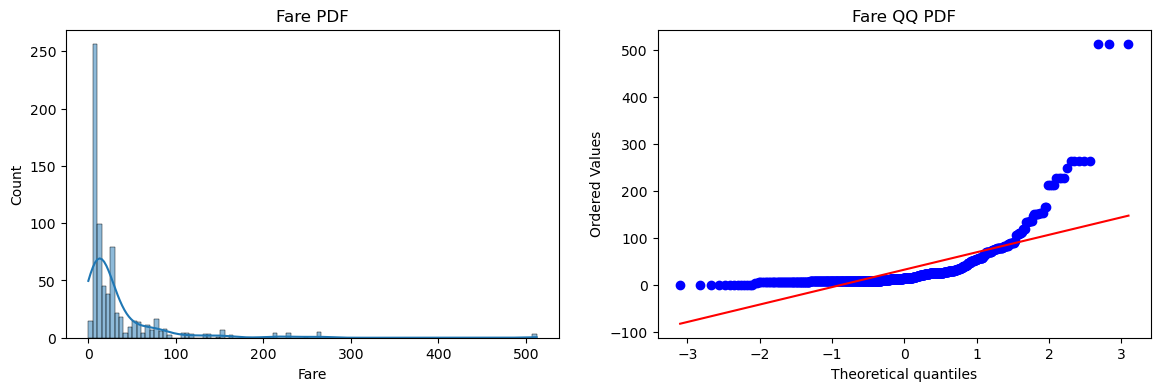

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train["Fare"], kde=True)
plt.title("Fare PDF")


plt.subplot(122)
stats.probplot(X_train["Fare"] , dist="norm", plot=plt)
plt.title("Fare QQ PDF")
plt.show()



In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [17]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR : ",accuracy_score(y_test,y_pred))
print("Accuracy DT : ",accuracy_score(y_test,y_pred2))



Accuracy LR :  0.6480446927374302
Accuracy DT :  0.6759776536312849


In [18]:
trf = FunctionTransformer(func=np.log1p)

In [19]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)
print("Accuracy LR : ",accuracy_score(y_test,y_pred))
print("Accuracy DT : ",accuracy_score(y_test,y_pred2))



Accuracy LR :  0.6815642458100558
Accuracy DT :  0.6703910614525139


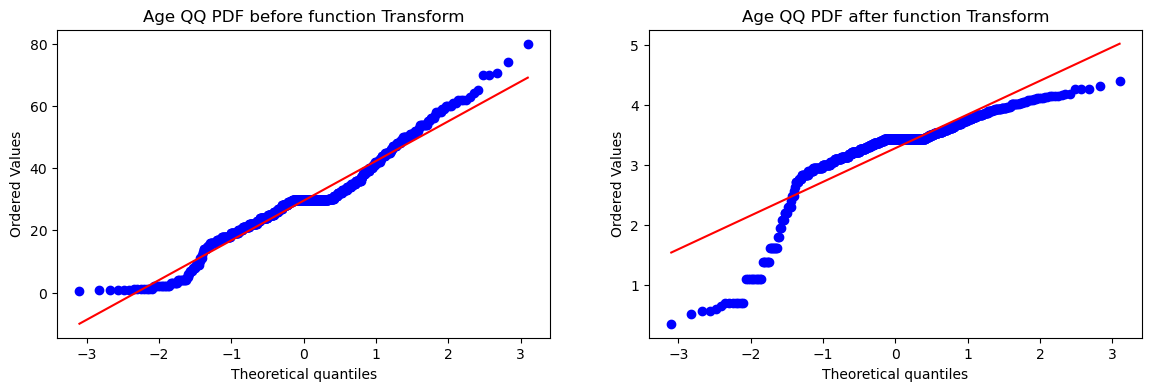

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train["Age"] , dist="norm", plot=plt)
plt.title("Age QQ PDF before function Transform")


plt.subplot(122)
stats.probplot(X_train_transformed["Age"] , dist="norm", plot=plt)
plt.title("Age QQ PDF after function Transform")
plt.show()

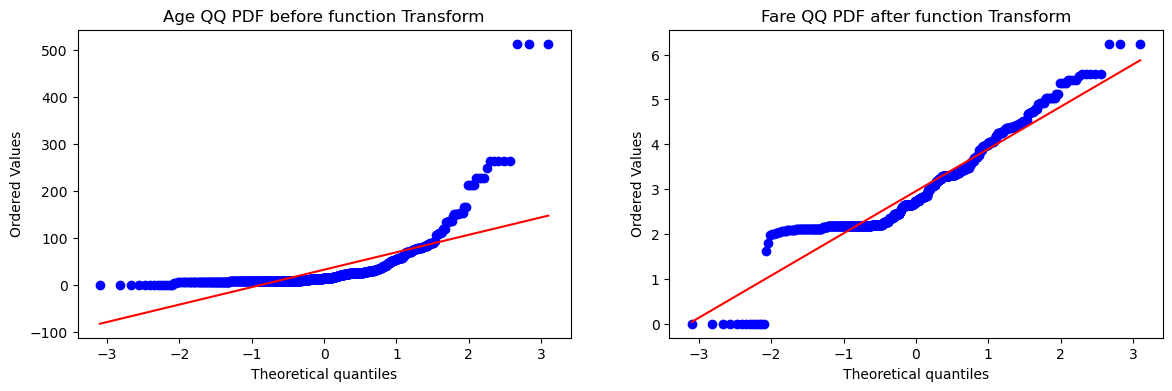

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train["Fare"] , dist="norm", plot=plt)
plt.title("Age QQ PDF before function Transform")


plt.subplot(122)
stats.probplot(X_train_transformed["Fare"] , dist="norm", plot=plt)
plt.title("Fare QQ PDF after function Transform")
plt.show()